In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

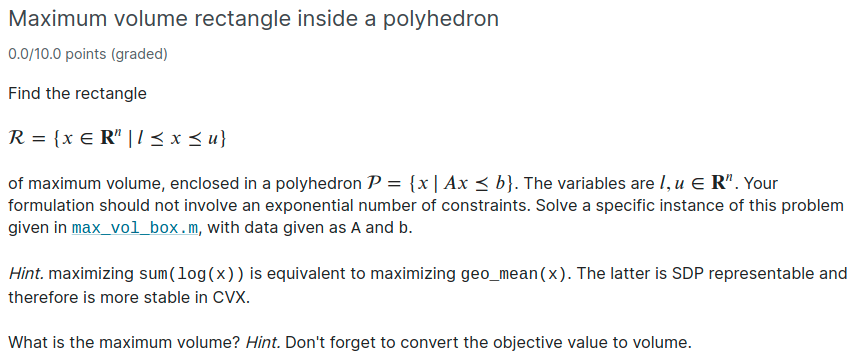

# Formulation

Maximize $\sum{log(d_i)}$  
s.t  
$d = r - l$  
$d \geq 0$  
$Ax \leq b, \quad \forall x : l \leq x \leq r$

-----

$Ax \leq b, \quad \forall x : l \leq x \leq r$  

is equivalent to  (for $i = 1,...,m$)

$a_i^T x \leq b_i \quad \forall x : l \leq x \leq r$ $\iff$  $\max_{l \leq x \leq r}\{a_i^T x\} \leq b_i$

$\iff \max_{l \leq x \leq r}\{a_i^T x\} = \max(a_i^T, 0)r + min(a_i^T,0)l \leq b_i$
 
We have then the LP formulation:  

$max(A,0)r + min(A,0)l \leq b$



# Problem data

In [2]:


A=[
    [1.2,-1.5,0.29,-1.1,0.47,-0.53,1.9,-0.59,0.4,-0.38,0.73,-0.49,0.17,0.66,-0.3,0.43,-0.17,-0.74,1.7,-1.7,0.25,1.1,-0.49,-0.033,-0.5,0.33,-0.68,0.6,-0.47,-1.8,-0.38,1.3,-1.2,0.71,0.22,-0.75,0.65,-0.64,1.6,0.42],
    [0.56,-0.69,1.1,-0.94,0.64,-1.6,-0.32,-0.032,-0.43,-1.7,-1,-0.85,-0.25,-0.18,1,1,0.13,0.14,-0.34,0.11,0.5,0.75,-1.3,-0.41,-1.3,0.23,-1.8,-0.84,0.95,0.62,0.019,0.44,0.53,-0.6,0.77,0.72,-0.93,0.22,-1.8,-0.084],
    [0.34,-0.022,-0.33,0.088,1.4,0.82,-0.25,-1.7,-1.5,0.64,-0.73,-1.4,-1.3,-0.85,-1.4,-0.39,0.085,-1.7,-1.6,0.76,0.0044,-1,-1.4,-1.5,0.6,-0.72,-0.16,-1.5,0.71,0.61,-0.12,-2.2,0.48,-0.029,0.13,-0.83,1.6,-0.13,0.7,0.54],
    [1.4,0.18,-0.074,-0.7,0.043,0.45,-0.31,0.81,0.66,1.2,0.23,-0.48,-0.36,1.6,0.27,-0.18,-0.42,-0.63,0.41,-0.89,-0.55,1.8,-1.3,0.52,0.37,0.014,-0.63,0.079,-1.3,-1,-0.73,-0.034,-1.7,0.95,-0.39,0.71,0.95,-0.88,-0.92,-1.8],
    [-0.49,-0.53,-0.16,0.3,-0.025,-1.3,2.1,0.5,-0.27,0.91,-1.3,-0.86,-0.36,-0.56,-0.13,2.1,-0.71,0.29,1,-0.085,-1.1,0.24,0.054,0.38,-0.082,-0.88,-0.19,1.2,0.36,0.056,0.95,-0.16,0.11,0.33,-0.38,1.3,1.1,-0.34,1.7,-0.14],
    [-0.067,-1.3,0.83,-0.064,-0.56,0.46,0.47,2.4,-0.32,-0.37,1,-0.41,0.74,-1.9,-0.095,1,-1.8,-0.78,1.6,0.32,-1,-1.9,2.1,-0.83,0.14,-1.4,0.46,-0.21,-1.3,-1.4,-0.39,0.99,0.17,-0.33,1.6,0.87,-0.25,-0.69,-0.88,-0.34],
    [-1.9,-0.21,-2.8,0.64,-1.1,0.21,-0.21,0.84,0.56,-1,-0.74,-1.3,0.91,-0.53,-0.53,-0.00074,0.99,2.5,-1.2,-0.4,0.21,2.7,0.83,-0.97,2.4,-2.2,-0.96,-0.077,0.31,0.39,0.9,0.14,0.64,-1.7,-0.48,-0.87,1.1,0.8,-0.5,-0.27],
    [-0.34,0.34,1.5,-0.36,-0.6,0.61,-1.6,0.71,-0.27,-0.38,-0.066,0.084,0.26,-0.72,-0.47,-1.4,0.69,-0.3,-0.43,-0.53,0.92,-0.33,1.3,1.5,-0.86,0.86,-0.99,-0.95,-1.4,-1.6,-1.5,0.24,0.85,-0.53,1.1,0.9,0.27,0.56,1.1,0.077],
    [-0.034,-2.4,0.27,0.25,2,-0.76,-0.82,-1,-0.21,1.5,0.33,-0.64,0.86,0.15,0.028,0.31,0.82,-0.13,1.5,0.76,-1.2,0.39,1.3,-0.98,-2,1.5,-0.9,-0.091,-1,2.8,0.74,0.66,-0.39,0.51,-0.37,-2.5,-0.68,-0.28,-2,1.3],
    [-0.44,-1.5,0.035,0.27,-0.75,1,-0.16,-0.11,0.25,-0.25,-0.85,-0.78,0.24,0.37,-0.91,0.19,-0.83,1.7,-0.82,0.96,0.27,-0.13,0.4,1.1,0.19,0.13,0.7,-0.75,-1.2,-0.82,-1.1,1.3,-1.4,0.13,0.44,-0.59,1,-0.18,-1.9,-1.2],
    [-0.16,-2.6,0.44,-1.2,-1.1,0.85,1.6,-0.31,-0.45,-0.17,0.38,0.73,0.52,0.31,-1,1.3,0.63,-0.0079,-0.94,-0.3,-0.51,0.73,0.092,-1.8,-0.85,1.5,0.2,0.3,1.2,-0.52,0.63,-0.78,0.038,0.074,-1.6,-0.59,-0.36,-0.39,-0.0077,-0.91],
    [-1.4,0.74,-0.98,0.99,1,0.56,0.74,-0.22,1.1,-0.2,0.12,0.012,0.87,-0.088,-0.61,-1.6,-1.9,0.85,-1.4,0.35,0.39,-0.22,-1.3,-0.14,-0.83,-1.5,0.18,0.86,2.2,-0.7,-0.35,-0.72,0.13,-0.26,2.8,-0.84,0.15,0.088,-0.41,-0.3],
    [-0.39,0.3,-0.2,0.19,-0.86,0.68,-1.3,-1.2,-0.49,0.9,-0.28,1.5,-0.35,0.97,0.62,-0.36,0.081,-0.32,0.8,1.7,1.7,-0.42,-0.22,1,-0.18,1.9,0.39,-1.3,-1.5,-0.36,0.12,2.4,-0.12,0.46,-1.2,-0.76,-0.36,0.51,0.18,-0.55],
    [1.6,1.5,-0.27,0.6,0.19,0.41,-0.34,0.69,0.88,0.41,-0.049,-1.8,-1.5,0.46,-0.47,0.65,0.87,1.8,0.084,-1,-0.045,-0.047,-1.8,-2.1,-0.77,-0.88,-1.2,1.4,-0.23,0.39,-0.38,2.3,-0.47,-0.081,-1.4,-0.22,1.7,-0.37,0.19,-0.58],
    [-0.38,-0.72,-0.42,1.2,0.11,2.2,-0.58,-0.26,0.25,-0.76,-0.025,-0.67,1.4,0.82,-1.5,1,1.2,-0.22,0.12,-1.3,0.52,-1.6,0.2,-0.59,0.4,-0.089,-1.5,-0.14,0.54,-0.2,-0.75,2.8,0.44,1.5,2.1,0.94,0.77,0.75,-1.1,1.1],
    [1.7,-0.71,0.49,-0.11,-0.41,1.9,-1.1,-0.01,-0.26,-1.3,-1.3,-0.72,0.51,-1.8,1.2,0.18,0.98,1.1,0.49,0.11,-0.84,1.1,-1,-1,-1.8,-0.6,-0.97,-0.3,-0.46,-2,-0.95,0.42,0.53,-1.1,-0.46,0.19,-0.8,-1.2,-0.98,1.7],
    [1,-1.9,-0.4,-1.6,1,0.75,-0.17,0.82,2.9,-0.76,-0.71,-0.1,-0.93,0.92,-0.96,0.8,0.56,-0.36,0.73,0.68,-1,1.1,-0.84,0.96,0.19,0.7,0.67,1.2,-1.8,0.11,0.041,-0.15,-0.57,2.4,0.057,0.49,-0.57,1.3,0.59,-1],
    [0.063,-0.29,-0.14,0.21,-1.2,-1.6,1.1,-0.18,0.95,-1.3,0.21,-0.16,-0.85,-1.9,0.51,0.32,1.4,-1.4,-0.16,0.82,-0.39,-1.3,-0.41,-1.1,0.76,1.3,-1.4,-1.1,0.36,-0.98,0.13,-1,-0.56,0.94,-1.1,-2.6,0.28,0.34,1.2,0.13],
    [-1,0.019,-0.1,1.1,-1.3,-0.64,1.3,-0.73,-1.6,0.72,0.39,0.24,-1.4,-0.52,-0.2,-1.8,-1.3,0.67,0.69,-1.9,-0.74,-1.2,-0.52,-0.025,0.022,0.097,0.04,3,0.86,-0.96,-1.3,1.4,-1.9,-1.5,-0.4,-0.62,0.49,0.85,-3.8,-0.41],
    [-1.4,-0.34,0.2,1.4,-0.21,-0.58,0.46,0.33,-0.027,0.69,-0.13,0.76,0.98,1,0.27,0.12,-0.19,0.2,-0.37,1.1,0.9,-1.2,0.26,0.6,-1.7,0.073,-0.51,-0.24,1.2,0.75,-0.2,0.66,-0.63,-0.34,-0.16,-0.4,1.1,0.64,1.1,-1.2],
    [1.4,-1.8,-0.12,-0.26,-1.3,-0.45,-0.96,-0.17,-0.88,-0.18,-0.94,0.86,0.022,-0.065,-1.3,-0.93,0.47,0.59,-0.27,0.021,0.92,0.22,-1,-0.32,0.12,-0.49,-0.65,-0.1,-1.3,0.095,1.4,-0.82,-0.47,-0.33,-0.056,0.54,-1,-1.3,-0.47,1.1],
    [-0.66,0.35,-0.16,1.3,0.81,-0.17,-1,0.3,-0.23,1.3,0.96,-0.9,0.92,-0.1,-0.53,-0.55,0.33,1.3,-1.6,-2.3,-0.28,-1.4,-0.1,-0.45,0.11,-0.83,-1,-0.47,0.1,0.12,-0.7,1.9,-0.61,0.24,1.1,-1.2,0.41,-0.67,1,0.18],
    [-1.6,-1.3,-0.49,0.19,1.2,-0.42,-0.23,-1.3,0.93,0.96,0.62,0.12,-0.19,0.44,-0.28,0.5,-0.46,-0.34,-1.2,-0.42,-0.028,0.36,-0.064,-1.8,-0.82,0.8,0.9,-0.8,3.1,0.72,-0.21,-0.82,0.49,-1.2,-1.8,0.012,-0.37,0.18,0.5,-2.7],
    [0.14,0.77,-0.52,-0.06,-1.2,-0.63,0.53,-1.1,-0.066,-0.37,-0.25,-0.22,-0.082,-0.62,-1.6,0.039,-0.85,0.3,-0.3,0.21,-0.17,0.63,0.7,-0.79,0.33,1.4,-1.8,-0.25,-0.95,0.15,-0.69,-0.49,-0.3,0.7,-1.1,-1.2,-0.96,-1.7,-1.2,0.23],
    [-2.6,0.075,-0.16,-0.53,-0.36,-0.18,0.66,0.47,0.69,-0.86,-1.1,-0.45,0.65,0.25,0.028,0.0015,1.5,0.58,-1.5,0.43,0.3,-1.3,0.76,-1.1,0.61,-0.28,0.46,-0.11,1.4,-0.92,-0.49,2,1.2,0.77,1.1,0.84,-0.017,1.4,0.25,-0.75],
    [-0.55,2.5,0.022,0.24,-1,0.22,2.1,0.96,-0.49,0.75,0.61,0.87,0.66,0.083,0.36,0.017,0.56,-0.63,1.7,0.12,-0.37,0.071,-1.2,-0.37,-0.96,-1.2,-0.23,1.2,-0.87,1.1,0.21,-1.9,1.9,0.1,0.31,0.69,1.3,0.98,0.38,0.86],
    [1,1.1,-1.1,0.82,-0.76,0.54,-1.4,-3,-0.62,0.74,0.16,-0.11,1.4,-0.65,0.39,1.7,-1.9,0.52,-2,0.18,-0.82,-2.3,2.8,2,0.6,0.09,-1.5,0.45,2.4,-0.25,2,2.3,-0.52,-0.0025,-1.9,-0.76,-0.29,0.53,-2.4,-0.066],
    [2,1,-0.046,1.7,1.7,-1.4,-0.082,1.3,-0.2,0.96,-0.7,0.93,-0.45,0.54,0.051,1.1,-0.83,-1,-1.4,0.089,-0.74,0.1,0.26,-0.5,-1.2,-0.044,1.1,-0.0037,-1.1,-0.84,-1.2,-1.3,-1.5,-1.1,1.6,0.24,1.2,-1.5,-0.74,-1.3],
    [2.2,1.7,-0.56,0.94,-0.46,-0.24,0.2,-1.2,-0.1,0.19,-0.5,0.069,0.26,0.81,-0.83,-0.22,0.76,-0.1,0.26,0.54,1.7,-1.6,0.16,-0.019,0.3,-0.2,0.83,-0.57,0.6,0.73,0.54,-0.11,-0.52,0.32,0.57,-0.36,1.3,-1.4,0.72,-0.59],
    [1,1.3,0.4,-0.0041,0.51,0.36,-1.7,0.4,1.5,-0.35,0.0038,0.24,0.12,0.76,0.84,0.75,-1.2,-0.31,0.18,-1.9,-0.58,-1.2,3.8,0.073,-1.2,-0.52,-0.56,0.12,-0.028,1.2,-1.4,-0.42,0.65,-1.3,-0.57,-0.3,2,0.32,1,-0.051],
    [-0.16,-0.9,0.32,0.66,-1.2,-0.67,-0.53,0.77,-1.6,-0.62,0.4,-0.33,-1.4,-0.21,-0.86,-0.19,-0.35,-1.1,-0.24,0.88,-0.85,-0.57,0.95,-1.1,0.19,-0.45,-0.95,0.34,2.3,0.25,-2,0.0073,-0.83,-0.25,0.058,0.49,0.58,-0.34,0.18,-0.83],
    [1.1,0.66,0.18,-0.3,-0.35,-0.92,0.69,0.63,1.3,1,-0.11,0.23,-0.53,0.97,0.65,-0.57,-1.8,2.5,1.8,-0.2,-0.4,0.66,0.25,0.11,-2.2,0.15,-0.34,-0.51,0.96,0.84,1,-1.9,-0.22,-0.35,0.4,0.76,-0.27,0.17,-0.15,0.83],
    [0.13,0.075,-0.7,-1.1,-0.072,1.1,0.037,0.23,-0.0054,-1.3,-0.55,1.3,-1.7,-0.026,-2.2,-0.65,-1.1,2,0.58,0.63,0.72,0.16,-0.18,2.1,-0.43,-0.97,0.62,0.28,1.3,0.1,2.3,-0.073,-0.3,-3.1,-1.3,0.37,2,1.4,-2.2,0.77],
    [-0.018,0.19,0.66,0.0003,0.63,-1.5,-0.56,0.31,-0.28,-0.048,0.7,1.2,0.15,-0.41,1.1,-0.88,-0.66,0.71,-0.55,0.83,2.2,0.64,-0.25,1.2,0.88,0.24,0.93,-0.91,-1,-0.27,-0.41,2.2,0.36,1.2,0.076,0.39,-0.59,-0.46,-0.54,0.99],
    [0.43,-0.52,-0.12,-0.15,0.45,-0.34,1.2,0.25,-0.68,0.97,-0.84,2.3,2,1.1,-1.3,-0.77,0.65,1.5,-0.6,1,0.38,-0.76,-0.014,3,-2,0.82,-0.068,0.67,1.1,-1.3,0.27,-0.83,-2.1,-0.6,-0.99,-1.4,0.79,0.22,0.13,1.3],
    [-1.4,1,-0.49,0.21,0.18,-0.87,-0.55,0.012,-1,1.8,-0.47,0.71,0.46,-0.31,1,-2,0.5,-0.19,0.36,-0.42,1.5,-0.91,-1.3,0.45,1.9,-0.1,-0.11,-0.92,0.89,0.64,0.17,0.89,-0.17,-0.17,-1.2,1.1,0.6,0.99,0.28,0.14],
    [1.7,0.94,1.4,1.7,-1,-1.8,-1.5,1.5,1,-0.6,0.27,-0.27,-0.77,0.31,0.34,1.4,-0.36,-2,1.2,1.5,-1.5,-0.2,0.29,-0.47,-0.27,0.018,1.2,1.1,-2.1,-1.4,-0.83,-0.28,0.48,0.25,1.2,-1.3,-0.31,0.41,0.059,2.2],
    [0.66,-1.1,0.63,-1.7,-0.38,1.2,-0.87,1,-0.52,-0.84,-0.19,-0.58,1,0.36,-0.27,-0.16,0.97,-1.1,-0.89,-1.1,-0.67,0.33,0.42,1.5,0.15,0.21,1.1,-1.9,-0.2,-1.9,1.4,0.031,-1.5,-0.4,-0.57,-0.9,-0.68,0.1,-1.3,1],
    [-0.71,-0.65,0.12,1.1,1,-0.39,1.2,0.18,-0.23,-0.22,-0.72,0.044,0.17,1.8,-1.2,-0.17,-0.55,-0.5,0.16,0.17,0.71,0.49,0.59,0.6,-0.77,-0.57,1.1,-0.76,0.52,-2.5,0.69,0.97,1.5,1.3,-0.0059,-0.01,-0.36,-1.1,2.3,-1.5],
    [1.6,1.7,0.76,-1.5,0.42,0.3,-0.66,0.27,-0.065,1.6,-0.77,1.2,-0.093,-1.1,0.68,-0.89,0.16,2.2,-1.6,0.58,-1.7,1.1,0.29,0.15,0.35,0.076,0.66,-1.1,-0.19,-0.75,-0.23,2.7,-0.83,-0.74,1.3,0.13,-0.42,-0.029,0.59,0.013],
    [-2,0.28,-1.3,0.17,0.062,-0.099,0.66,-0.87,0.49,0.087,1.6,-0.25,1.2,0.059,-0.19,0.32,0.41,0.21,-1.1,-0.55,-0.69,-1.4,1.4,1,0.35,-0.27,0.42,0.11,-1.4,-0.88,-0.44,2.7,0.56,0.29,-0.34,2,-0.65,1.3,-0.35,-0.76],
    [0.81,-0.083,-0.098,-0.37,0.45,-0.81,-0.22,-1.6,1,0.029,-1.3,0.12,1.9,-0.27,-1.4,0.71,0.0037,-0.42,-0.7,-0.76,-0.27,-0.72,0.34,0.96,0.36,0.58,-1.7,-1.3,0.42,0.26,-0.66,-2.9,-1.8,-0.92,-0.68,0.72,1.2,0.98,0.64,0.078],
    [0.24,0.37,-0.32,0.57,0.55,0.74,0.74,1.2,0.28,0.37,-1.2,0.32,-0.6,0.89,1.3,-0.63,-0.84,2.2,0.15,0.98,0.65,0.31,-0.92,-0.25,-1.8,-0.28,-0.3,0.81,0.95,-2,1.1,0.93,-2.1,-0.88,-0.21,-0.39,-0.0034,-0.04,0.8,0.23],
    [0.32,-0.81,-1.7,0.51,0.44,1,0.65,0.49,-1.6,-0.16,0.59,-0.31,-0.85,0.32,1.2,0.3,-0.8,-0.17,0.3,-1.6,-0.34,-0.43,-1.2,1.2,-1.2,-0.33,1,1.9,1.7,0.55,-2.4,-1.7,0.56,-0.2,0.81,1.3,-1.3,1,-0.57,0.72],
    [0.52,1.9,0.38,0.47,0.28,0.8,0.039,0.28,-1.2,-1,1.8,-0.7,-1.1,-0.47,0.98,-0.73,1,-0.37,-0.78,-0.88,0.34,-1.4,-0.74,0.47,1.2,0.12,0.53,0.79,-0.93,1.6,1.9,-1.8,-0.16,2.1,0.2,-1.6,-0.54,-0.98,0.15,0.75],
    [0.15,1.9,0.12,0.67,0.25,0.63,0.58,0.071,-0.09,-0.099,-0.13,-0.1,0.14,1.2,-1.4,-2.6,-1.3,0.5,0.52,0.2,1.6,-0.31,0.5,0.2,0.72,-1.6,0.38,-0.38,-0.15,0.31,1.3,0.82,0.059,1.3,0.29,0.37,-1.2,-0.94,0.84,0.036],
    [-0.43,-2.5,-0.45,-1.6,0.87,-2.3,-0.36,0.27,-4.1,-0.93,-2.3,1.3,-1.5,-1.3,0.5,1.7,1.3,0.15,1.1,0.19,-0.48,0.52,0.46,0.69,0.32,-1.2,-0.72,-1.9,-0.23,-0.49,0.81,-0.97,-0.0034,-0.036,1.1,-0.22,0.56,0.6,-0.44,0.93],
    [0.68,-0.4,-0.71,-1.7,-0.6,-0.24,0.61,-1.1,-0.21,0.37,0.047,-2.2,0.33,0.13,0.18,-0.95,0.079,-1,-0.14,-0.73,0.18,-0.22,1.6,0.47,1.3,-0.94,-1.1,-0.69,1.6,-0.84,-0.12,0.22,-0.68,-0.096,0.4,-0.22,0.93,-1,-0.57,0.42],
    [0.84,0.11,0.47,0.0061,-0.073,-0.81,1.1,-0.26,-0.37,1.5,-1.9,0.0028,-1.1,0.85,0.52,-0.4,-0.05,0.71,0.17,1.7,0.28,0.0051,0.85,-0.39,-2.1,-0.34,-0.58,0.29,-2.8,0.22,0.16,-0.39,-0.77,-0.043,2.2,0.065,1.5,-1.5,0.35,0.23],
    [0.24,0.52,-1.9,-0.43,-0.76,0.38,-0.55,-0.74,-0.28,-0.57,-1.1,-0.7,1.1,1,-1.2,-0.076,0.95,0.39,0.012,-1.3,0.56,-1.2,-1.6,-0.37,2.4,-0.93,-1.1,-1.1,0.3,0.47,-1.1,-0.8,0.32,-0.54,0.16,0.54,-0.71,0.57,0.39,-0.068],
    [0.32,-0.59,-0.24,-0.83,-1.2,-0.19,-0.69,0.6,0.86,-1.1,-0.51,2.3,-0.95,1.2,-0.86,0.9,-1.6,1,-1.1,0.13,-0.59,2.1,0.95,-1.5,0.41,0.55,0.12,0.43,-2.1,-0.59,-2.4,1.1,0.79,-0.49,1.3,-0.26,0.14,-1.3,-0.55,-0.36],
    [0.73,-1.1,-0.71,0.11,-1.7,-0.58,-0.45,-0.41,-0.42,1.2,-1.9,-0.64,-1.6,-0.4,0.69,-0.87,-0.33,0.86,1.4,-0.69,-1.3,-1.3,0.84,-1.7,-0.25,0.21,-1.4,-0.14,-0.4,-1.7,0.43,-1.5,0.72,-0.19,0.26,-0.91,-0.96,-0.08,-1.3,-0.17],
    [0.099,-1.2,0.23,0.44,-0.41,0.14,0.74,-1.9,0.8,0.74,1.7,-0.31,-0.96,0.4,0.81,2.6,-2.5,-0.58,1,-0.47,-0.13,0.37,-1.1,-0.28,-0.13,-0.044,1.6,-0.13,-0.26,-1.1,0.29,0.22,0.21,1,0.56,-1.6,-0.28,2.2,-0.23,-0.56],
    [0.056,0.087,0.098,-0.078,-1.6,-0.59,-2.4,-0.21,1.8,0.93,1.3,-0.81,-0.65,-1.5,0.59,-0.51,-0.66,0.22,0.28,-0.24,0.69,0.27,-1.3,-0.89,-0.64,-0.36,-0.2,0.054,0.59,-0.35,-1.1,-0.082,1.2,0.3,0.18,0.06,1.6,1.3,0.41,-0.4],
    [-0.61,0.2,0.044,-0.26,0.33,0.73,-0.74,-0.96,0.35,0.48,-1.8,-0.77,1.7,0.63,0.38,-0.16,-1.9,0.61,0.19,-1.2,-1,0.041,0.45,1.2,1.7,-0.67,-0.89,0.39,-1.9,-1.4,-0.58,0.14,1.7,0.095,0.6,-0.13,0.53,-0.2,-0.82,0.37],
    [-0.27,1.7,-0.55,0.96,0.28,-0.8,1.9,0.81,-1,-0.84,1.4,1.3,-0.074,-0.89,3.1,-0.76,0.2,-1.1,-0.11,0.54,0.23,-0.15,-1.9,1.9,-0.1,1.3,-2.3,-1.2,0.15,0.34,3,1.5,-0.41,-0.75,1.5,-2.5,0.82,-0.75,0.26,-0.035],
    [-0.031,0.71,1.9,0.86,-0.26,-1.1,0.58,-2.1,1.4,1.8,-1.4,-1.9,-0.98,0.068,-0.024,-0.49,-1.6,-1.4,1.1,0.96,1.7,0.67,-0.89,-1.3,0.71,1.2,0.2,0.15,-0.56,1.4,-0.88,-0.57,-1.4,0.76,1,-0.02,-0.67,-1,0.94,0.25],
    [-1.3,0.012,0.18,1.7,0.86,0.17,-0.064,0.27,0.058,0.2,-0.73,-0.1,-0.43,0.15,-0.12,2.1,0.26,1,2.6,-0.16,0.76,-1.1,-1.4,0.69,-0.56,-0.26,1.5,0.063,-0.7,0.59,0.62,-0.84,0.74,1.5,-0.66,-1.8,1.4,0.53,-0.92,0.44],
    [1.4,1.6,-0.86,0.71,-0.0056,-2,0.39,1.5,0.55,1.2,-0.61,-1.3,0.99,-0.045,1.8,0.85,0.26,0.039,-1.5,-0.69,-0.29,0.98,0.27,-0.23,1.3,0.46,1.1,-0.47,-1.1,0.42,0.58,0.71,1,-0.28,1.5,-1.8,-0.77,-0.2,0.74,-0.58],
    [0.54,-1.1,-1,0.5,1.3,1.1,0.03,-0.93,1.1,0.91,-1.3,-0.016,2.2,-0.45,-0.85,-0.82,0.4,1.1,0.47,-0.46,0.5,0.4,-1.5,0.86,-1.4,-0.39,-1.9,0.64,-0.6,0.013,0.71,2.1,-1.4,-0.57,-0.41,-0.034,-2.5,0.35,-0.2,0.15],
    [0.032,0.41,-0.34,-1.1,-0.8,0.26,-1,1,-1.5,0.1,0.2,1.1,1.6,-0.62,0.66,-0.4,-1.2,0.055,-0.16,-0.28,2.1,1.5,-0.3,1,-0.5,0.24,0.7,1,0.064,-1,0.65,-0.69,0.87,0.44,0.063,0.23,0.44,-0.55,-1.1,-0.46],
    [-0.88,0.3,-1.4,-0.015,0.53,0.39,2.7,-0.82,2.2,-0.017,2.2,-0.87,0.82,-0.43,-1.4,0.63,0.22,0.24,-0.91,0.53,0.45,-0.01,1.3,1.2,-0.28,-0.21,1.1,0.14,-0.86,-0.93,1.5,-1.1,-0.73,0.4,-0.86,0.23,-0.89,1.3,0.31,-0.5],
    [1.8,0.85,-0.32,1.3,-0.24,0.16,0.22,0.6,0.25,1.2,-0.26,-2.2,0.06,0.71,0.27,-0.16,-0.83,0.7,0.45,1.6,-0.44,1.6,-0.18,-0.28,-1.6,1.6,1.4,0.16,-1.4,0.61,-0.64,0.27,1.5,0.42,1.8,0.4,-1.2,-0.046,-0.99,0.65],
    [1.5,0.9,-2.1,-0.58,0.6,-1.1,-2.6,0.44,-0.21,-0.44,1.8,0.092,0.53,-0.85,1.9,1.4,-0.6,-1.4,0.31,0.43,-1.5,0.35,-0.87,-0.4,-0.49,-1.6,1.8,-1.5,-1.5,-1.9,2.1,1.4,0.63,1.3,1.6,-2.3,-0.27,-0.55,1.1,0.13],
    [0.42,1.8,0.92,-0.59,-1.9,0.034,-1.9,0.95,-1.1,0.97,1.2,-1.4,-0.74,0.5,1.3,-0.66,1,0.44,0.87,1.8,-0.42,-0.11,0.65,0.71,-0.021,0.078,-1,-0.34,1.1,-0.32,-2,-0.36,-0.44,0.041,-0.37,0.59,-0.34,0.41,0.7,1.7],
    [-0.45,-0.051,-0.74,0.35,0.69,-1.1,0.12,0.3,1.5,-0.12,1.3,1.6,-1.2,-0.41,-0.31,-0.099,-0.14,-1.3,0.43,-0.72,-0.52,0.49,0.24,-0.89,-0.59,-0.64,-0.65,0.33,0.037,0.52,1.1,-0.62,-0.57,-0.036,0.79,-2.6,0.72,-0.0043,0.82,-1],
    [1.2,1.6,0.51,-0.11,0.67,-0.58,0.32,0.23,-0.35,-1.2,0.72,1.8,0.81,0.83,-0.11,0.67,0.41,0.038,1.1,1.2,0.65,0.047,-0.32,-0.1,1.9,2.4,0.69,-2.2,-0.91,-0.68,2.4,0.99,-0.29,-0.33,0.92,-0.53,-0.6,-0.034,0.3,1.1],
    [-0.29,0.1,-0.17,-1.3,-1,-0.42,0.52,-0.75,1.4,2,-1.3,-1.8,0.72,1.9,0.0061,0.12,0.67,-1.7,0.3,0.14,-0.15,0.9,-0.51,-0.56,-0.055,0.57,0.86,-1.9,-0.01,-0.16,-0.45,0.68,-1.1,-1,0.19,-1.2,-0.85,0.18,-1.3,-0.67],
    [3.8,1.3,0.062,-1.6,0.59,0.21,0.78,1.9,0.6,-0.12,-0.39,-0.17,1.2,-1,1.2,0.064,-1.3,0.13,-0.081,0.09,0.32,-1.4,0.056,-0.5,0.12,0.36,0.58,-0.067,1.1,-0.6,1,-2.2,-1.6,-0.0027,0.33,-0.83,0.42,-1.1,0.32,-0.75],
    [-0.48,1.6,-0.47,-1.2,0.29,1.6,-0.16,-0.35,-1.3,-0.51,-0.51,-0.84,0.56,0.62,0.68,-0.11,-0.14,0.44,0.039,-0.41,-0.73,-0.97,-0.38,-0.27,-0.41,-0.54,0.48,-0.75,-0.97,0.01,-1.2,-0.26,0.83,-1.7,0.0063,-0.87,-2.3,0.61,2.1,0.57],
]

b = [4.9e+002,2.3e+002,1.4e+002,6e+002,2.1e+002,29,8.3e+002,1.4e+002,14,2e+002,68,5.9e+002,1.7e+002,7e+002,1.7e+002,7.3e+002,4.6e+002,27,4.3e+002,6e+002,6e+002,2.9e+002,6.9e+002,62,1.1e+003,2.3e+002,4.3e+002,8.6e+002,9.5e+002,4.4e+002,68,4.8e+002,55,7.5,1.8e+002,6e+002,7.5e+002,2.9e+002,3e+002,6.6e+002,8.7e+002,3.5e+002,1e+002,1.4e+002,2.2e+002,66,1.8e+002,2.9e+002,3.6e+002,1e+002,1.3e+002,3.1e+002,43,23,2.6e+002,1.2e+002,13,5.6e+002,5.9e+002,2.3e+002,14,3.8e+002,7.7e+002,6.2e+002,1.8e+002,2e+002,5.1e+002,1.2e+002,1.6e+003,2.1e+002]

A = np.array(A)
b = np.array(b).reshape(-1,1)

A.shape, b.shape

((70, 40), (70, 1))

# Solving

In [5]:
m,n = A.shape

r = cp.Variable((n,1))
l = cp.Variable((n,1))

logVol = cp.sum(cp.log(r-l))
# logVol = cp.geo_mean(r-l)
obj = cp.Maximize(logVol)
C = [
    r >= l,
    A.clip(min=0) @ r + A.clip(max=0) @ l <= b,
]

prob = cp.Problem(obj, C)
prob.solve()
assert prob.status == cp.OPTIMAL

print('objective function:', prob.value)
volume = np.prod(r.value-l.value)
print('volume:', volume)

objective function: 124.1396181785671
volume: 8.187511224005318e+53
